In [25]:
## Run below dependency functions. The correct file location on the datasheets and schematic tray picture is also necessary.

from math import trunc
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib.pyplot as plt
import PIL

def find_tray_entries(main_dict, tray_id, day_id):
    tray_entries =[]
    for entry in main_dict:
        if entry["Tray_ID"] == tray_id and entry["Day_ID"] == day_id:
            tray_entries.append(entry)        
    return tray_entries           

def draw_dot(image, row, column, colour):
    x0 = 134 + 218*column
    y0 = 141 + 236*row
    x1 = x0 + 130
    y1 = y0 + 130
    pos = (x0, y0, x1, y1)
    draw = ImageDraw.Draw(image)
    draw.ellipse(pos, fill = colour, outline = colour, width=1)
    
def pos_id_to_row_column(pos_id):
    pos_id = pos_id - 1
    row = 7 - pos_id%8
    column = 12 - trunc(pos_id / 8)
    return (row, column)
    
def find_tray_entry(tray_entries, row, column):
    for entry in tray_entries:
        pos_id = entry["Pos_ID"]
        if pos_id_to_row_column(pos_id) == (row, column):
            return entry
    return None
    
def draw_tray(main_dict, tray_id, day_id, background_image):
    img = background_image.copy()
    tray_entries = find_tray_entries(main_dict, tray_id, day_id)    
    for row in range(8):
        for column in range(13):
            entry = find_tray_entry(tray_entries, row, column)
            if entry["Germinated"] == 1:
                draw_dot(img, row, column, "Red")
            elif entry["Germinated"] == 0:
                draw_dot(img, row, column, "Blue")
    return img

def combine_figure(main_dict, columntitle, total_trays, blue_start = 300, colour_multiplier_red = 300, colour_multiplier_blue = 300):
    print(get_fraction_list(main_dict, columntitle, total_trays))
    for pos in range(1,105):
        row = pos_id_to_row_column(pos)[0]
        column = pos_id_to_row_column(pos)[1]
        if pd.isna(get_fraction_list(main_dict, columntitle, total_trays)[pos-1]):
            draw_dot(img, row, column, "White")
        else:
            Colour_red = int(get_fraction_list(main_dict, columntitle, total_trays)[pos-1] * colour_multiplier_red)
            Colour_blue = int(blue_start - (get_fraction_list(main_dict, columntitle, total_trays)[pos-1] *colour_multiplier_blue))
            Colour_tuple = (Colour_red, 0, Colour_blue)
            #print(Colour_tuple)
            draw_dot(img, row, column, Colour_tuple)
    return img    

def get_pos_average_list(main_dict, columntitle, total_trays):  
    pos_average = []  
    for pos in range(1,105):
        single_fraction = []
        for entry in range(len(main_dict)):
            if main_dict[entry]["Pos_ID"] == pos:
                single_fraction.append((main_dict[entry][columntitle]))             
        NA_count = 0
        No_na = []
        NaN = float("NaN")
        for entry in single_fraction:
            if pd.isna(entry):
                NA_count = NA_count + 1
            else:
                No_na.append(entry)    
        if total_trays - NA_count == 0:
            pos_average.append(NaN)
        else:
            pos_average.append((sum(No_na) / (total_trays - NA_count)))    
    return pos_average

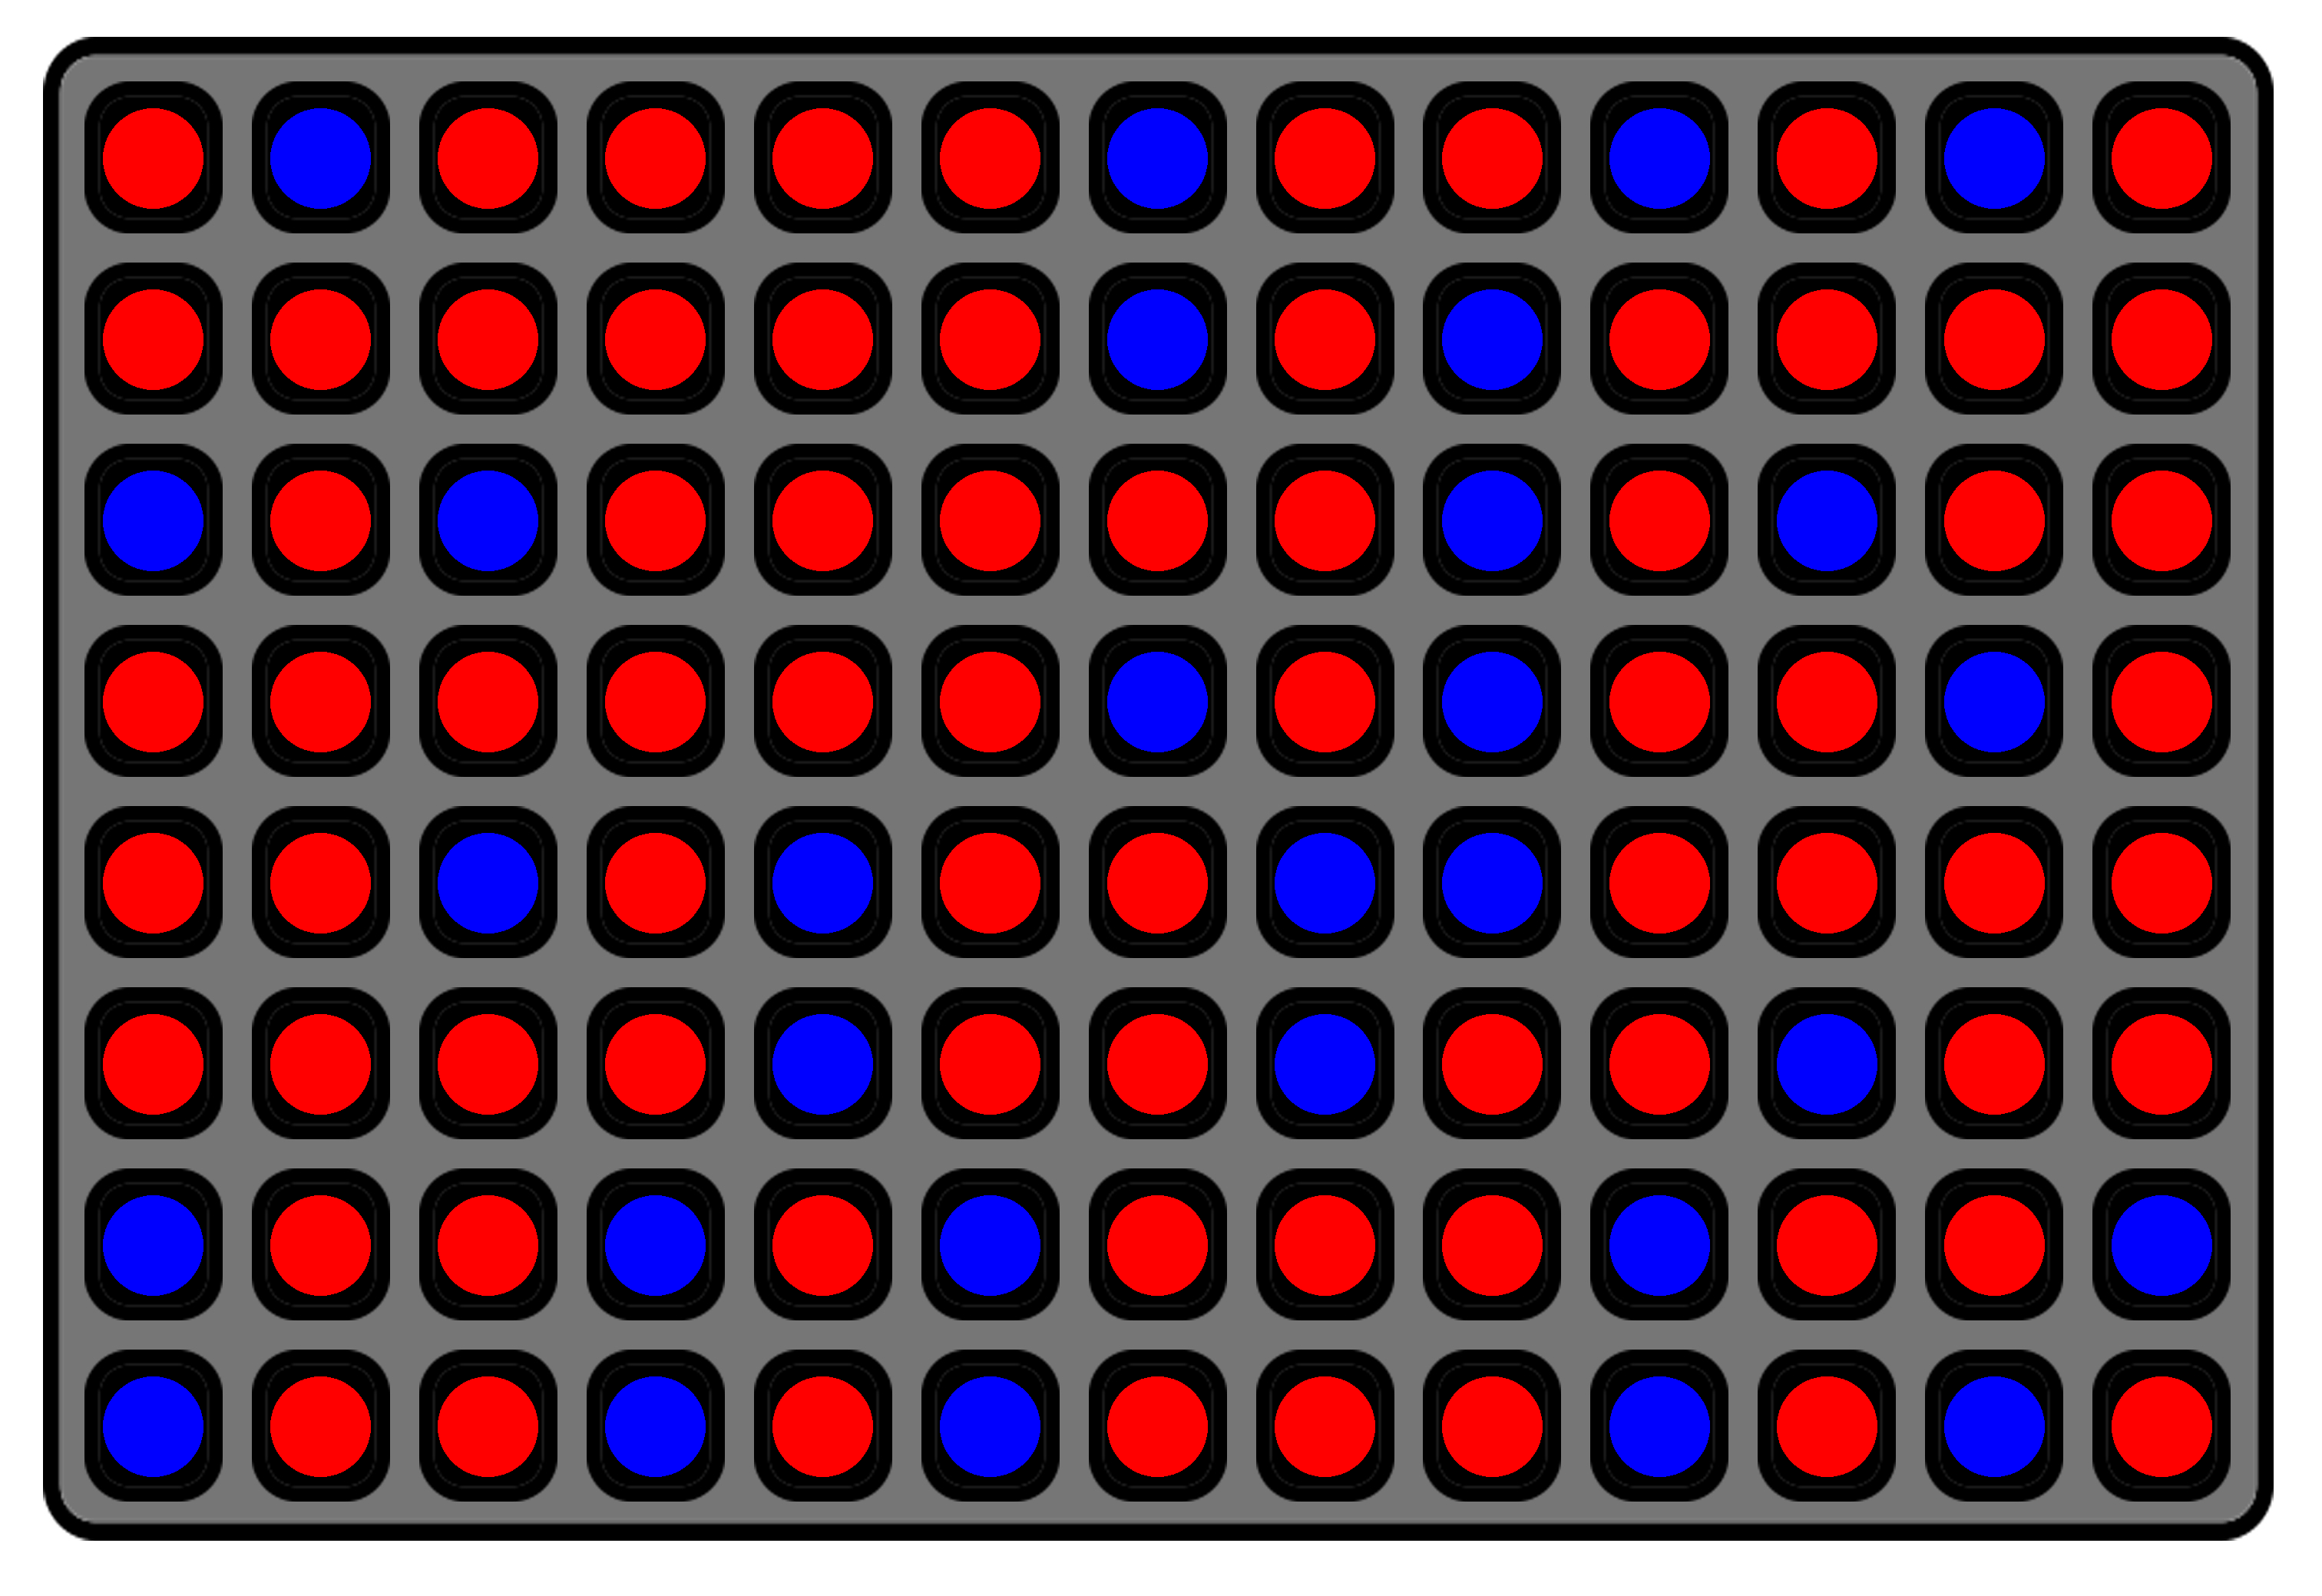

In [26]:
##### DATA & EMPTY TRAY #####

## Open Excel file as dataframe.

df = pd.read_excel('C:/Users/3791483/surfdrive/Experimental_data/GWAS/Phenotyping panel Solynta/Phenotyping_Panel_Datasheet_completed4.xlsx', sheet_name=1)


## Change dataframe datatype to dictionary.

Hybrid_dict = df.to_dict('records')

## Open background image.
background_image = Image.open("C:/Users/3791483/surfdrive/Photos/Phenotyping_Tray_schematic.jpg")
img = background_image.copy()


## Run 'draw_tray' function, which works as follows:
## Day 1, tray 1 has been used as input here for the example.

draw_tray(Hybrid_dict, 1, 1, background_image)

## - It creates a copy of the background image to draw circles (perfect ellipses) on using the 'draw_dot' function.
## - Uses the function 'find_tray_entries' to make a seperate list called 'tray_entries' aside from the main_dict that 
##   only contains entries that have the tray_id and day_id as asked for in the 'draw_tray' arguments.
## - Loops over the data via the row and column index (top left to bottom left and then the next column in the schematic
##   background image).
## - For every position in the tray (using the loop) it finds the index that coresponds to the position on the tray using
##   the 'find_tray_entry' function, which converts the "Pos_ID" value *(range(104))* to the coordinates needed for the 
##   'draw_dot' function.
## - Finally, for every position in the tray (using the loop) it executes an if statement for the dataset, and runs the
##   'draw_dot' function with the colour responding to whether values in the dictionary match the if statement or not.

[0.6250437785519418, 0.6179048121044662, 0.6281737683544065, 0.39599187421400306, 0.43110849386327166, 0.136718760132007, 0.6009859305521698, 0.7557576453686068, 0.9918447736074303, 0.9984133809496366, 0.5641574964037106, 0.05803377026212564, 0.04969384214671946, 0.9493823416187936, 0.04802300958528216, 0.318336301496675, 0.8314400545557099, 0.4425030534036726, 0.06577442635795072, 0.7885889238486138, 0.7966488233440621, 0.7505862096025484, 0.5280844452955432, 0.6992609206796306, 0.27076315229606474, 0.7875262439846925, 0.6792676336769523, 0.3123831391633787, 0.489096689862733, 0.49580483237154016, 0.654381802756176, 0.9272490512252761, 0.9967504948248861, 0.5284425185701145, 0.2911066914264755, 0.3180514532534843, 0.30717457538069803, 0.8043500022402569, 0.5540079417874448, 0.2960836455385293, 0.6023021466625986, 0.309982688209157, 0.13861881752955296, 0.7772781305170645, 0.6179944220105086, 0.18326875090772943, 0.04675752595925842, 0.8498740905474801, 0.09864622058462769, 0.079876459

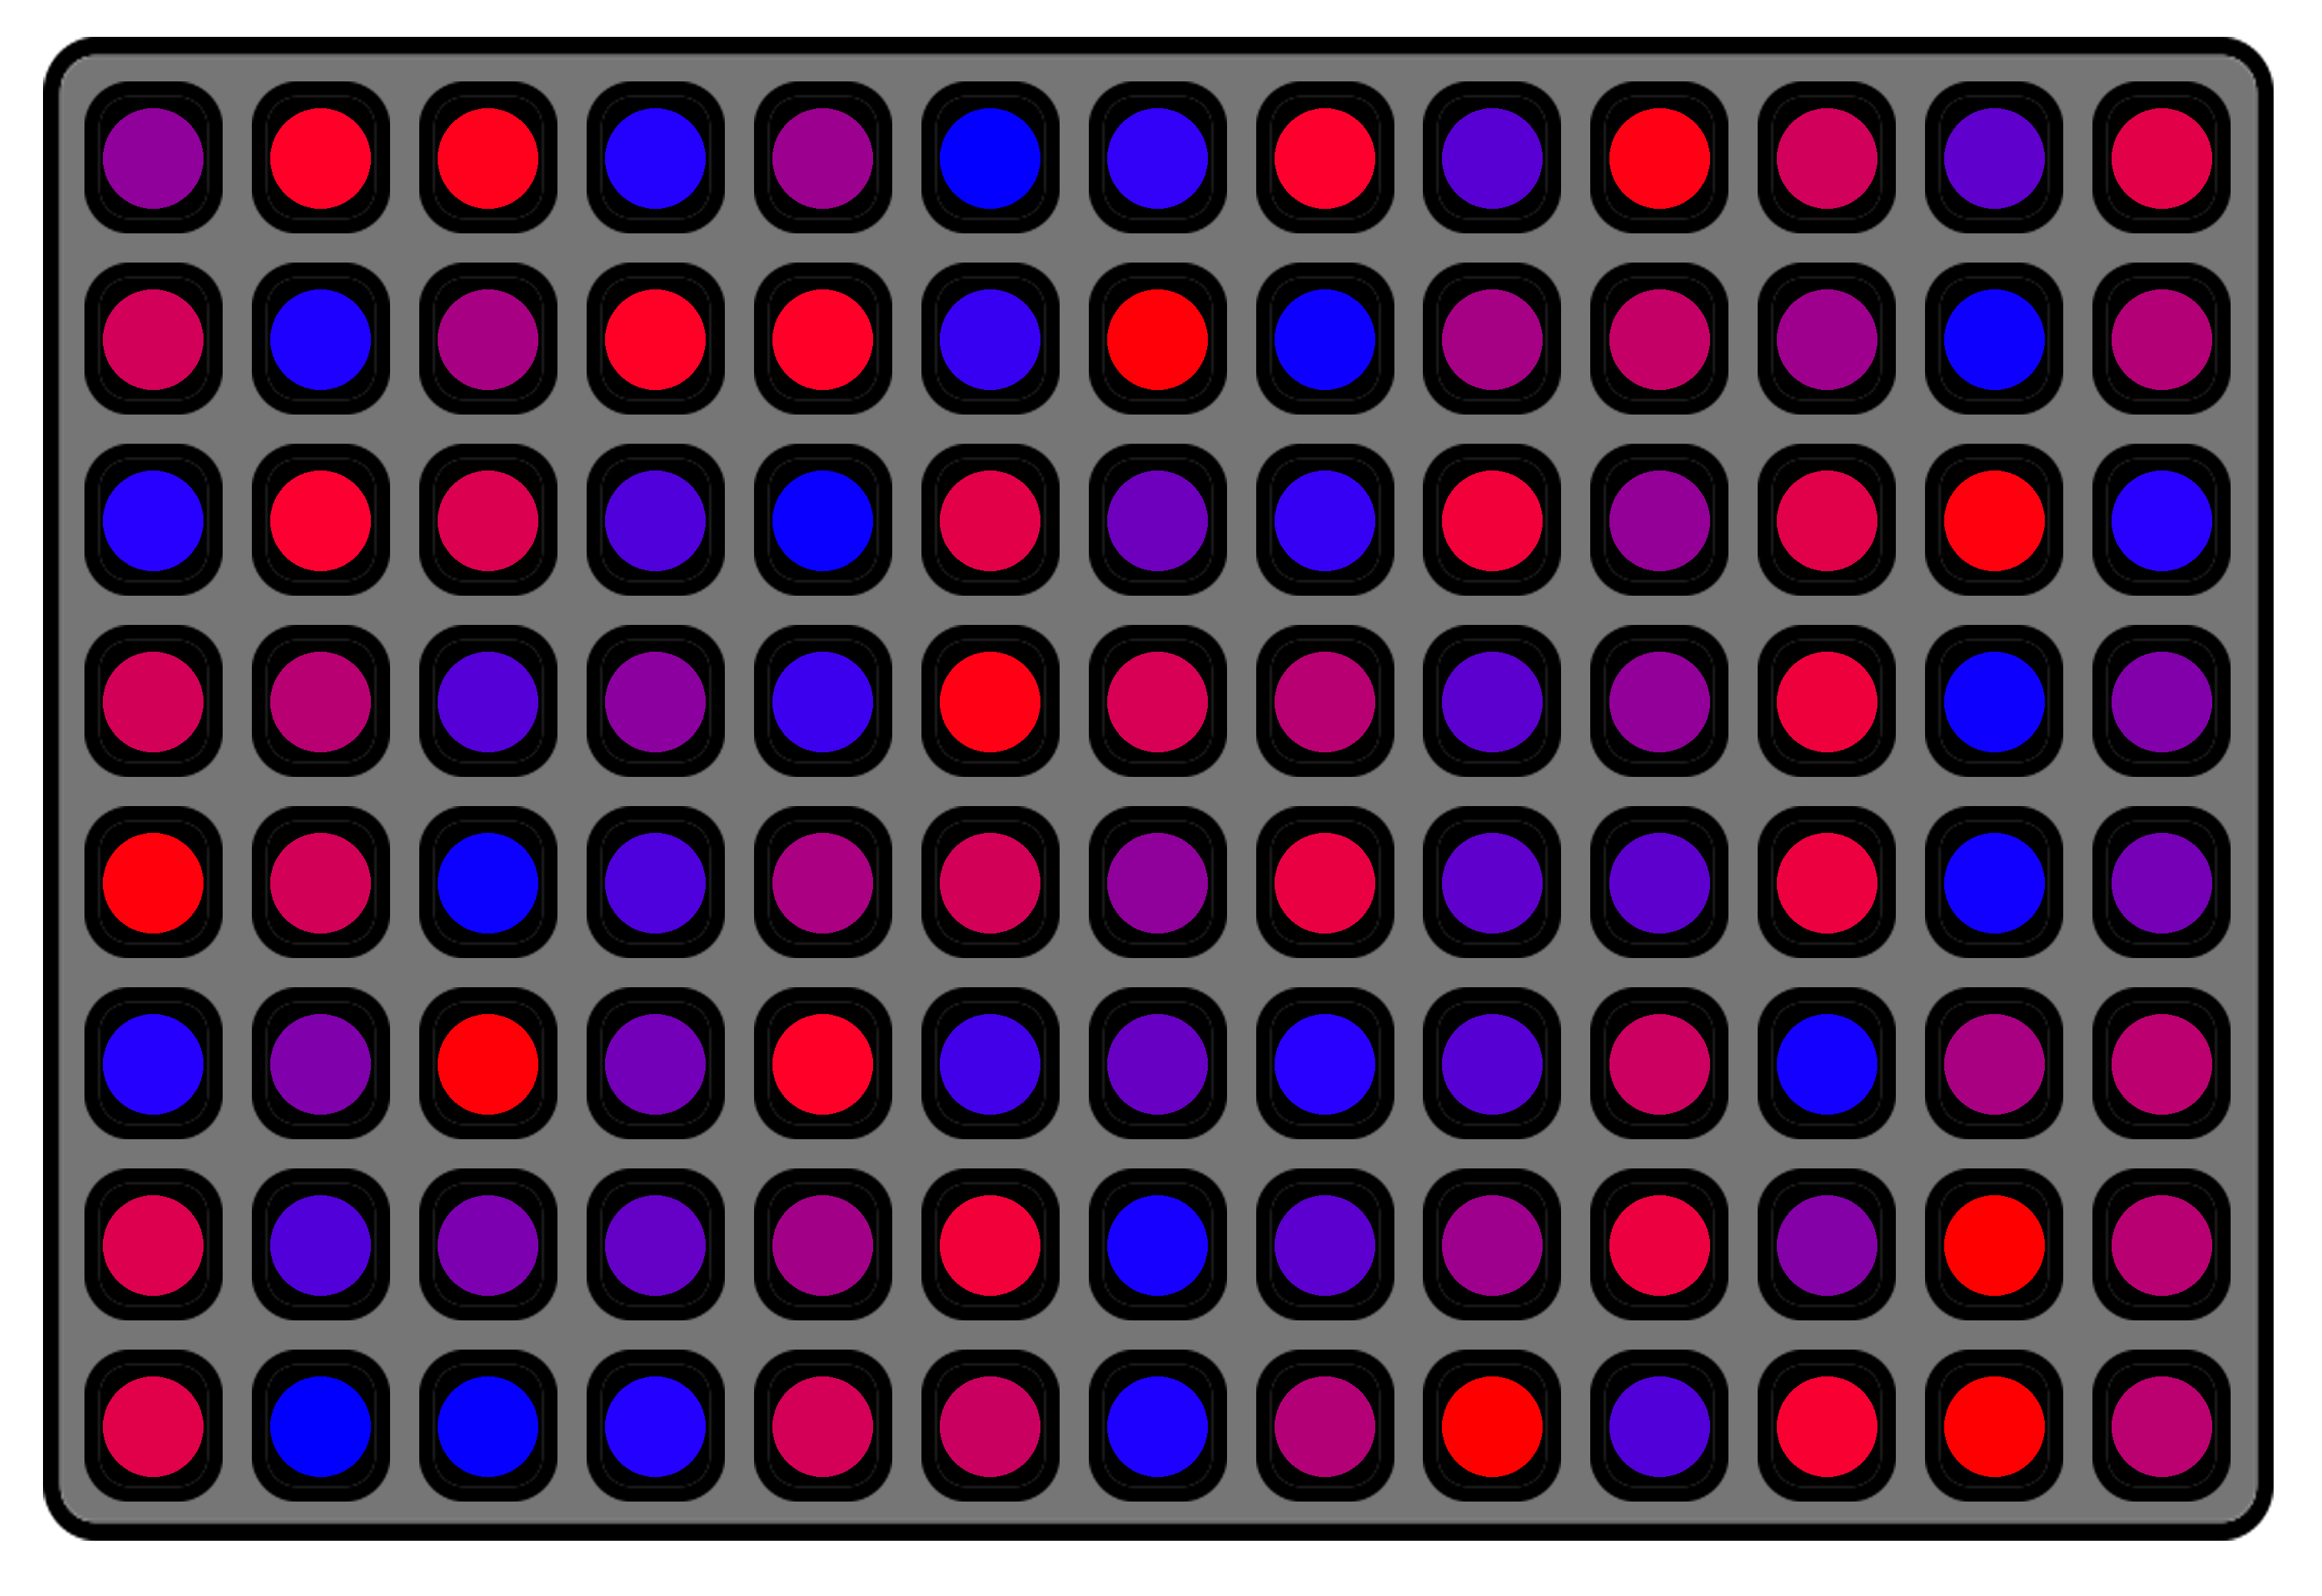

In [27]:
## Randomized tray fraction script that uses the dependencies of the function.

import random

background_image = Image.open("C:/Users/3791483/surfdrive/Photos/Phenotyping_Tray_schematic.jpg")
img = background_image.copy()


list1 = []

for entry in range(104):
    n = random.random()
    list1.append(n)
    
print(list1)


value_output = 0.7






#for row in range(8):
#    for column in range(13):
#        Colour_red = int(value_output * 1000)
#        Colour_blue = int(1000 - (value_output * 1000))
#        draw_dot(img, row, column, Colour_tuple)
        
for pos in range(1,105):
#    pos_id_to_row_column(pos)
    row = pos_id_to_row_column(pos)[0]
#    print(row)
    column = pos_id_to_row_column(pos)[1]
#    print(column)
    Colour_red = int(list1[pos-1] * 300)
    Colour_blue = int(300 - (list1[pos-1] * 300))
    Colour_tuple = (Colour_red, 0, Colour_blue)
    draw_dot(img, row, column, Colour_tuple)
    
img

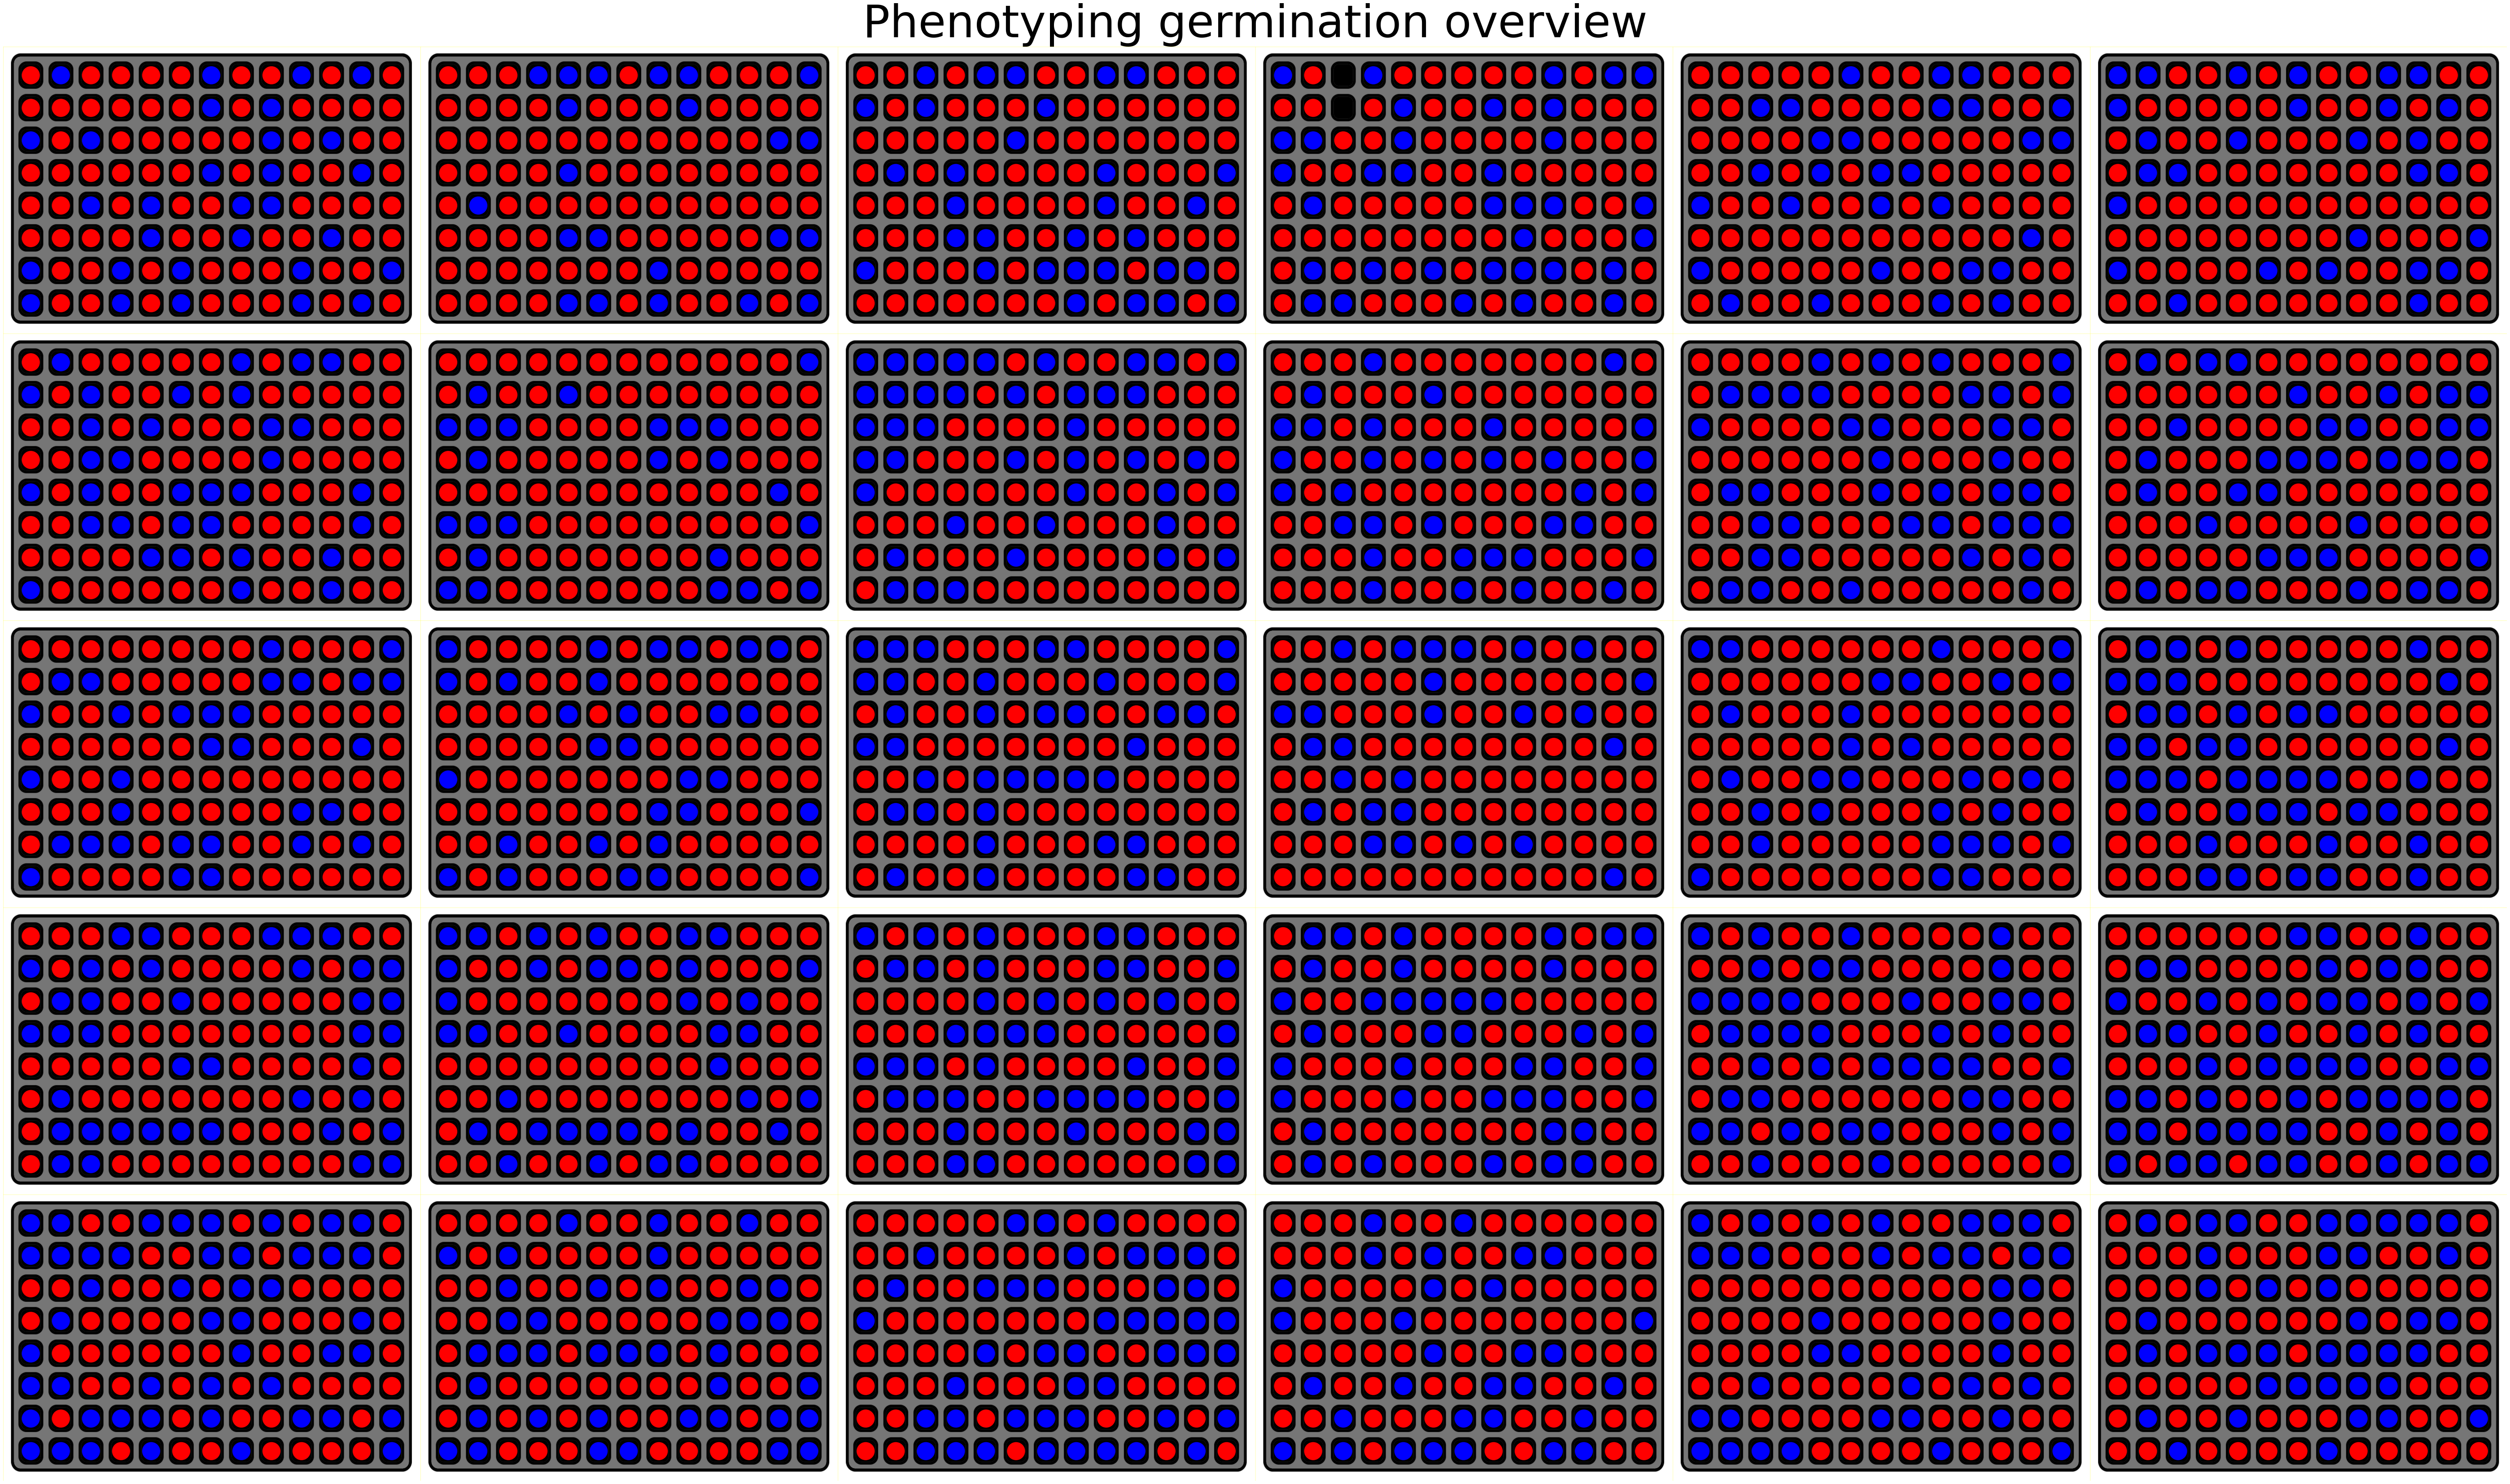

In [3]:
## Combining individual generated images into 1 overview. The reason that there is a tray with 2 missing data inputs 
## for germination is that for this line, only 8 seeds were available instead of 10.

background_figure = PIL.Image.new(mode = "RGB", size=(18144, 10395), color = "Yellow")




data_figure = background_figure.copy()
for tray in range(1,7):
    for day in range(1,6):
        figure_input = draw_tray(Hybrid_dict, tray, day, background_image)
        day_pos = day - 2079 +2079*day
        tray_pos = tray - 3024 +3024*tray
        Image.Image.paste(data_figure, figure_input, (tray_pos, day_pos))

plt.figure(num=1, figsize=(100, 100),)
plt.title('Phenotyping germination overview', fontsize = 100)
plt.xlabel('Trays', fontsize=50)
plt.ylabel('Days', fontsize=50)
plt.axis('off') # use 'on' for displaying day and tray axes
plt.imshow(data_figure)
plt.show()



The average Total_stolon_length  is: 

 2.2779403289018676 
The average value per position in the tray, starting from the bottom right and continueing per column, is:

 [2.2222222222222223, 2.2857142857142856, 1.8333333333333333, 2.4285714285714284, 2.090909090909091, 2.3636363636363638, 1.875, 2.375, 2.5, 2.25, 2.3333333333333335, 1.8, 2.5, 1.5555555555555556, 2.4, 2.7142857142857144, 2.3333333333333335, 2.5714285714285716, 2.0, 2.111111111111111, 2.125, 2.25, 2.25, 2.5, 2.2857142857142856, 2.0, 2.142857142857143, 2.3333333333333335, 1.75, 2.0, 2.25, 3.0, 2.0, 2.5, 1.8, 2.125, 2.0, 1.8888888888888888, 2.75, 2.0, 2.3333333333333335, 2.0, 2.75, 2.25, 2.5, 1.8571428571428572, 2.5714285714285716, 2.2222222222222223, 2.1538461538461537, 1.875, 1.75, 2.2, 1.875, 1.8333333333333333, 2.625, 2.6666666666666665, 2.4444444444444446, 3.75, 1.9, 2.0, 2.3333333333333335, 2.0, 2.3333333333333335, 2.4545454545454546, 2.0, 2.0, 2.142857142857143, 2.6, 2.142857142857143, 2.25, 2.375, 2.111111111111111,

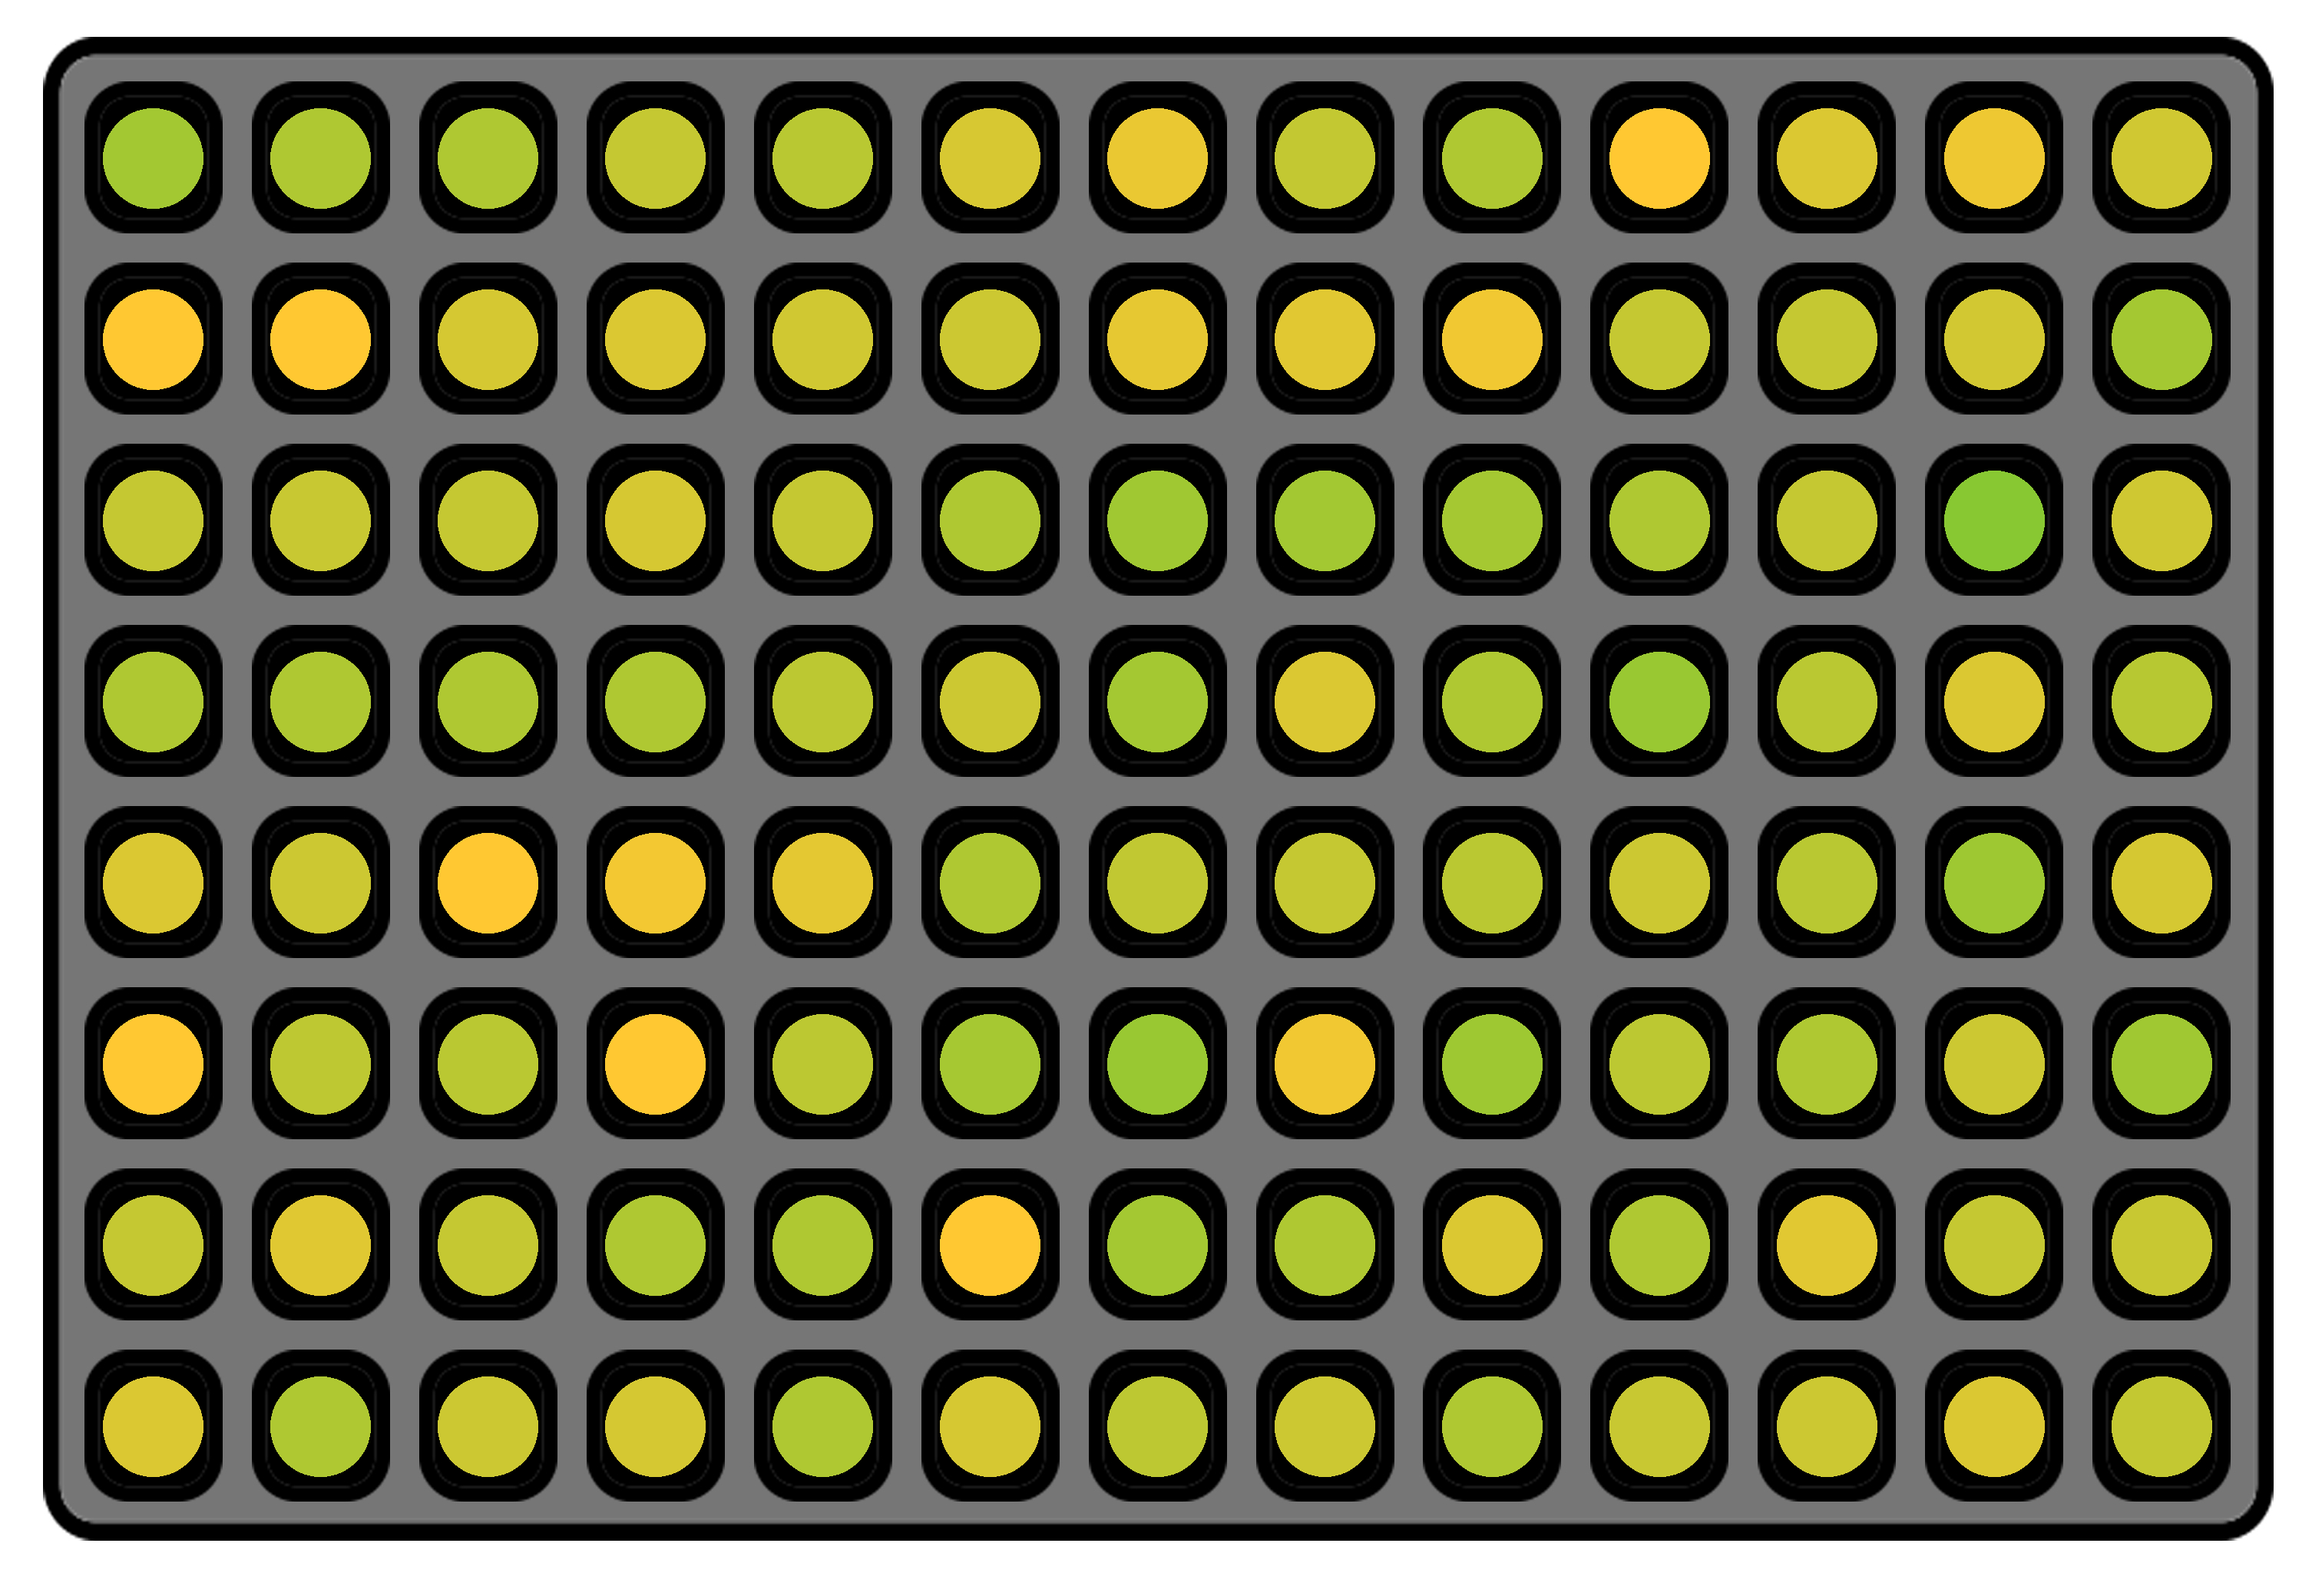

In [30]:
## Generates the position average of data for which the statement is true and shows this in a single tray. WIP on getting clearer colour
## based differences. This is currently done manually by changing the colour_blue starting value and correction.


import numpy as np
import pandas as pd


# Read in the dataset.

df = pd.read_excel('C:/Users/3791483/surfdrive/Experimental_data/GWAS/Phenotyping panel Solynta/Phenotyping_Panel_Datasheet_completed4.xlsx', sheet_name=1)

## Change dataframe datatype to dictionary.

Hybrid_dict = df.to_dict('records')


## For a different input, change the string in the "" in the for loop. It's a round about method of calculating the average.


individual_value = []
list_total = []
for i in range(3120):
    for key, value in Hybrid_dict[i].items():
        
        if "Stolon_" in key:
            if pd.notna(value) and Hybrid_dict[i][key] == 0:
                individual_value.append(np.nan)
            elif pd.notna(value):
                individual_value.append(Hybrid_dict[i][key])
    if sum(individual_value) == 0:
        list_total.append(np.nan)
    elif sum(individual_value) > 0:
        list_total.append(sum(individual_value))
    if sum(individual_value) == 0: #and Hybrid_dict[i]["Germinated"] == 0:
        Hybrid_dict[i]["Total_stolon_length"] = np.nan
    else:
        Hybrid_dict[i]["Total_stolon_length"] = sum(individual_value) 
    individual_value = []

for i in range(3120):
    for key, value in Hybrid_dict[i].items():
        
        if "Amount_total_stolons" in key:
            if pd.notna(value) and Hybrid_dict[i][key] == 0:
                individual_value.append(np.nan)
            elif pd.notna(value):
                individual_value.append(Hybrid_dict[i][key])
    if sum(individual_value) == 0:
        list_total.append(np.nan)
    elif sum(individual_value) > 0:
        list_total.append(sum(individual_value))
    if sum(individual_value) == 0: #and Hybrid_dict[i]["Germinated"] == 0:
        Hybrid_dict[i]["Total_stolon_length"] = np.nan
    else:
        Hybrid_dict[i]["Total_stolon_length"] = sum(individual_value) 
    individual_value = []
    


#print(list_total)

Column_name_input = "Total_stolon_length"

print("The average", Column_name_input, " is: \n\n", sum(get_pos_average_list(Hybrid_dict, Column_name_input, 30))/104, 
      "\nThe average value per position in the tray, starting from the bottom right and continueing per column, is:\n\n", 
      get_pos_average_list(Hybrid_dict, Column_name_input, 30))


## To write the Total_internode_length/other 

#pd.DataFrame(Hybrid_dict).to_excel('C:/Users/3791483/surfdrive/Experimental_data/Phenotyping panel Solynta/OUTPUT.xlsx')
            
img = background_image.copy()

## Prints out the fraction values per position (starting from the bottomright circle on Pos_ID = 1 
## and from bottom to top ending up at Pos_ID = 104).
#print(get_fraction_list(Hybrid_dict, "Total_internode_length", 30))




for pos in range(1,105):
    row = pos_id_to_row_column(pos)[0]
    column = pos_id_to_row_column(pos)[1]
    ## Add following bit of code in combination with fraction_extreme to see differences more clearly
    #test_fraction = fraction_list[pos-1] * 10
    Colour_red = int((get_pos_average_list(Hybrid_dict, Column_name_input, 30)[pos-1])/(sum(get_pos_average_list(Hybrid_dict, Column_name_input, 30))/104) * 200)
    Colour_blue = int(200)
    Colour_tuple = (Colour_red, 200, 50)
    #print(Colour_tuple)
    draw_dot(img, row, column, Colour_tuple)

img    
                

In [32]:
## Revert the ImageJ issue with values larger than 1 being values above 1000 back to values with 1,***.

df = pd.read_excel('C:/Users/3791483/surfdrive/Experimental_data/Baseline_experiments/Baseline 2 Phenotyping panel UU 2 6x10/Phenotyping_Baseline_2.xlsx', sheet_name=0)

## Change dataframe datatype to dictionary.

Hybrid_dict = df.to_dict('records')

print("An example of a faulty value: ", Hybrid_dict[14]["32DAS_Internode_3"])

for i in range(240):
    for key, value in Hybrid_dict[i].items():
            if "Internode" in key:
                if pd.notna(value):
                    if int(value) > 1000:
                        updated_value = value / 1000
                        Hybrid_dict[i][key] = updated_value
                        #print(Hybrid_dict[10]["Length_internode_2"])
                        
print("\nAfter updating the same value: ", Hybrid_dict[14]["32DAS_Internode_3"])

## Below script writes the updated Hybrid_dict to an excelfile. The Hybrid_dict is first converted (back) to a dataframe for this
## the updated_value is found in the OUTPUT file


pd.DataFrame(Hybrid_dict).to_excel('C:/Users/3791483/surfdrive/Experimental_data/Baseline_experiments/Baseline 2 Phenotyping panel UU 2 6x10/OUTPUT.xlsx')



An example of a faulty value:  1.683

After updating the same value:  1.683


In [33]:
## Any weird inputs?

df = pd.read_excel('C:/Users/3791483/surfdrive/Experimental_data/GWAS/Phenotyping panel Solynta/Phenotyping_Panel_Datasheet_completed4.xlsx', sheet_name=1)

## Change dataframe datatype to dictionary.

Hybrid_dict = df.to_dict('records')

for i in range(3120):
    if pd.isna(Hybrid_dict[i]["Has_stolon"]) == True and Hybrid_dict[i]["Stolon_1"] > 0:
        print("Data issue!")
        print(Hybrid_dict[i]["Pos_ID"])
#    elif pd.isna(Hybrid_dict[i]["Has_stolon"]) == True and pd.isna(Hybrid_dict[i]["Stolon_1"]) == True:
#        print("Everything is fine!")
#        print(Hybrid_dict[i]["Pos_ID"])



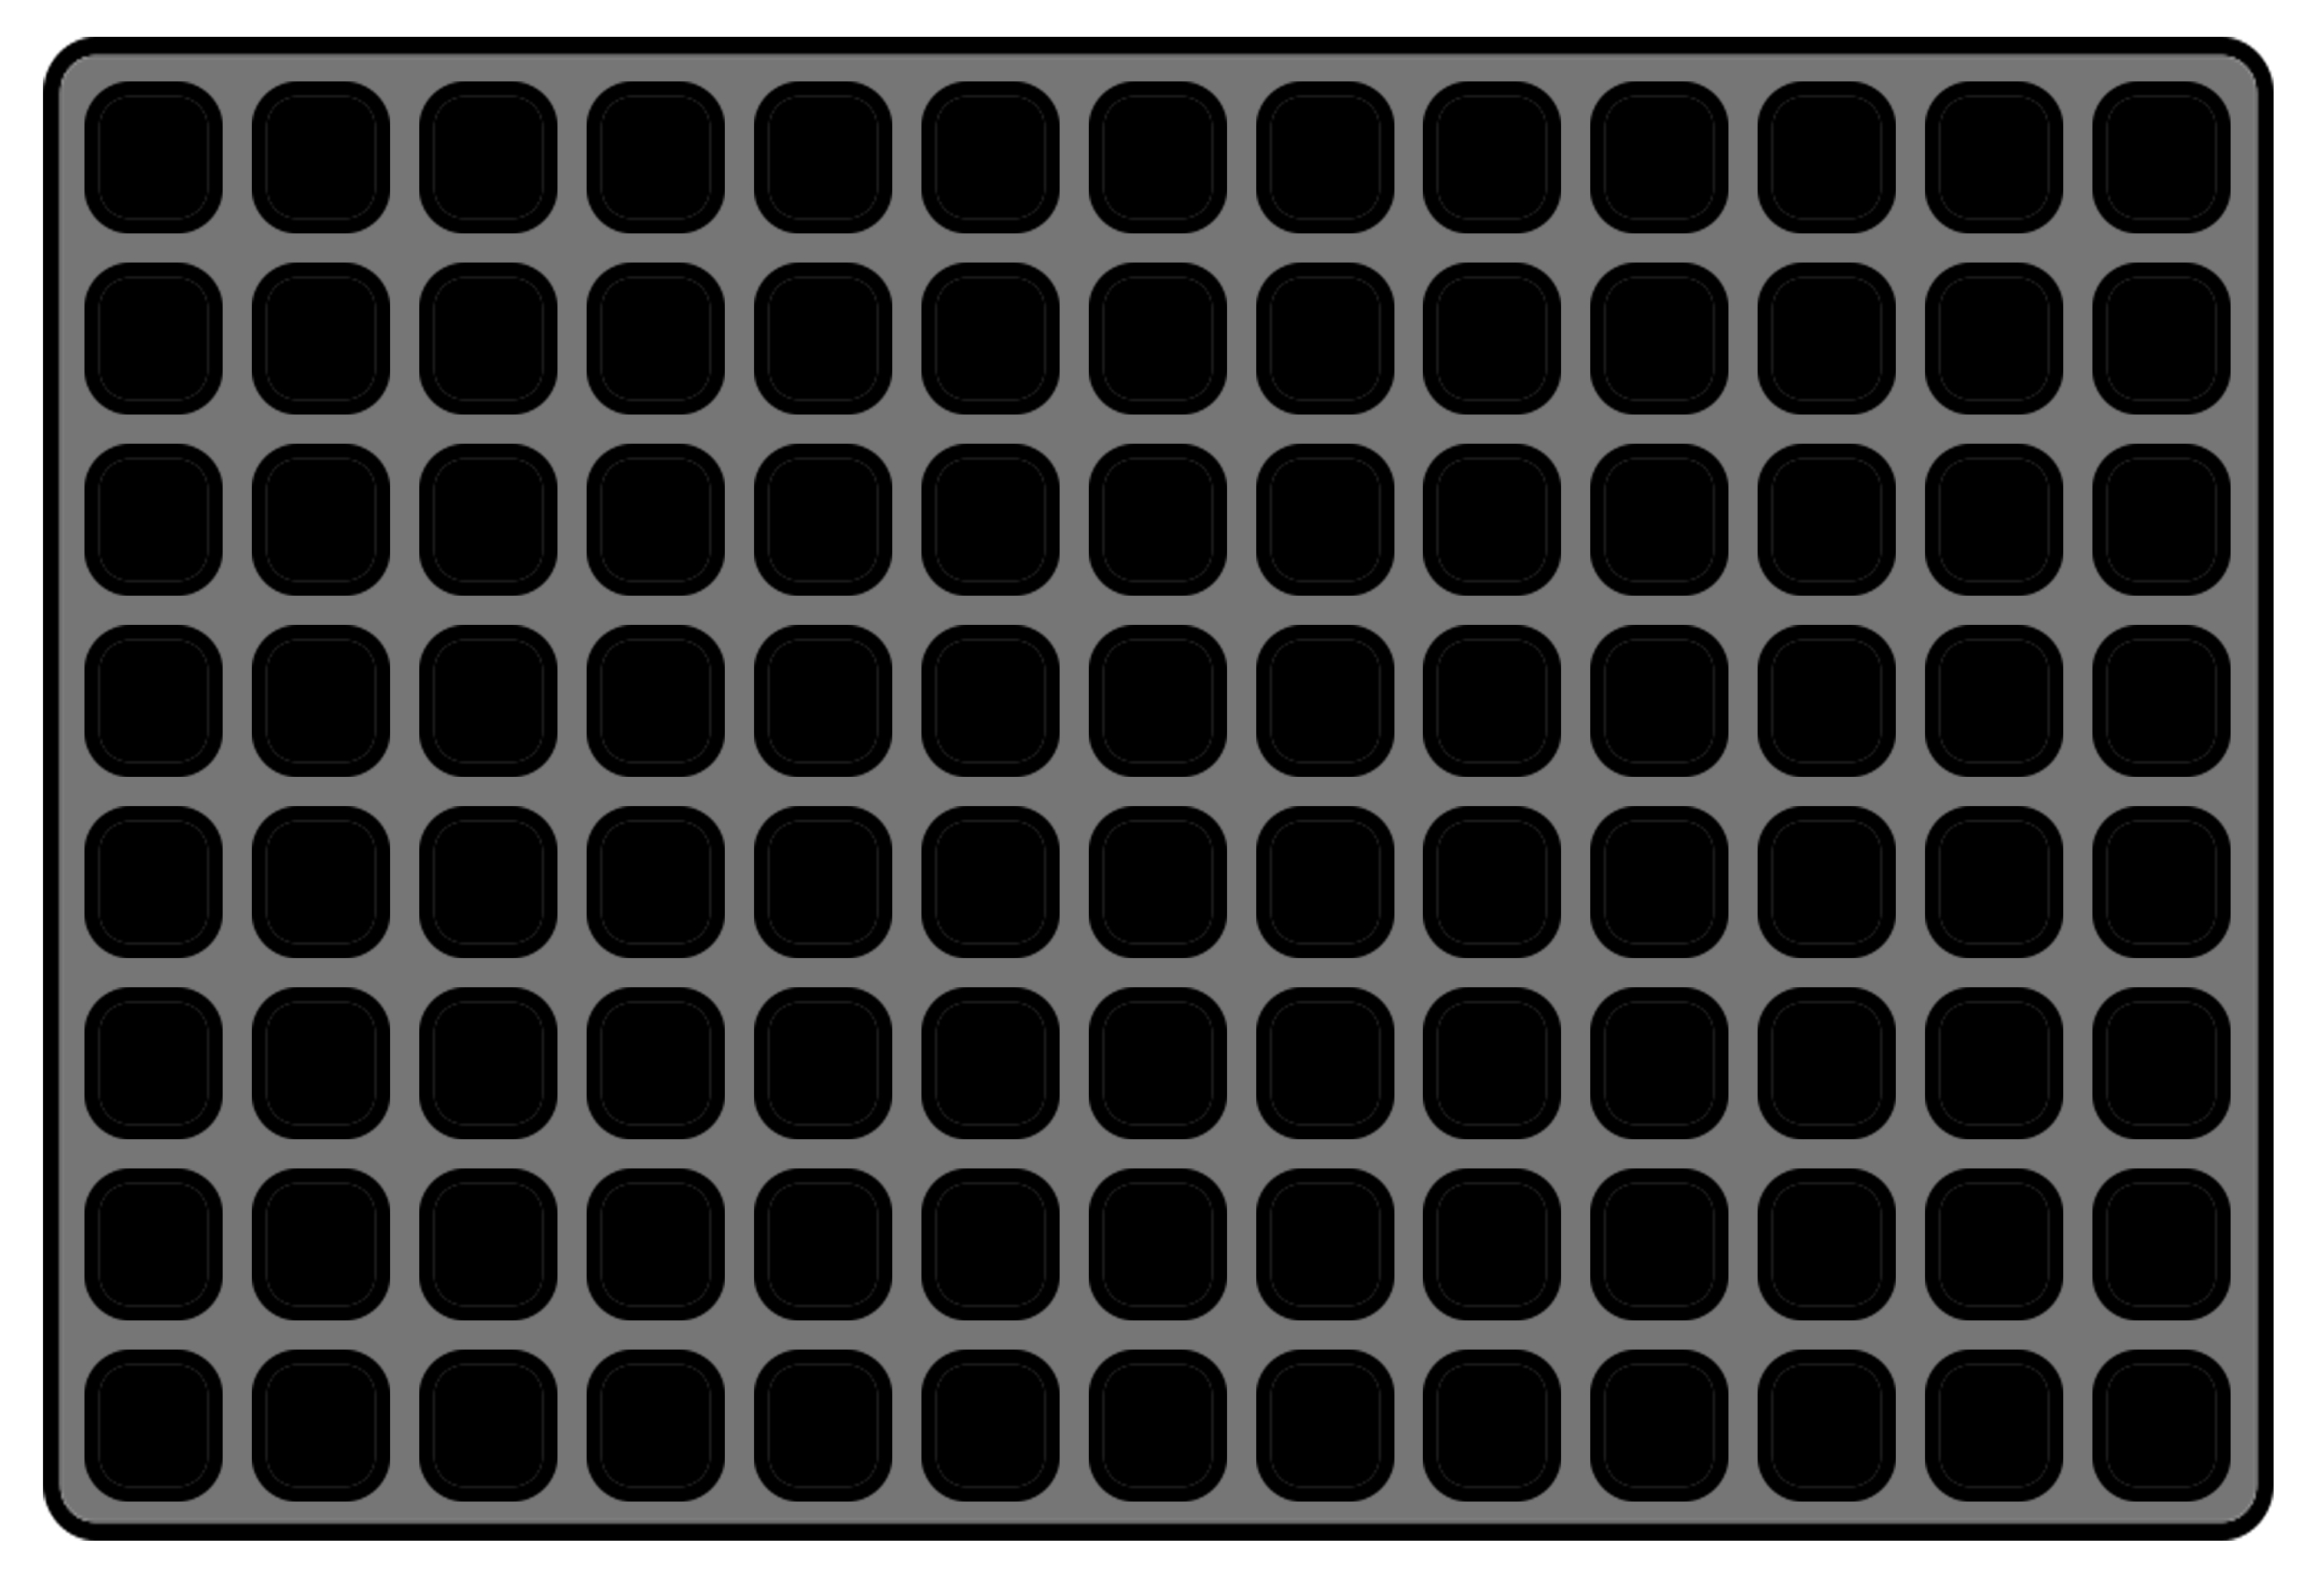

In [34]:
from PIL import Image, ImageDraw

img = Image.open("C:/Users/3791483/surfdrive/Photos/Phenotyping_Tray_schematic.jpg")
           
img
            


            

        

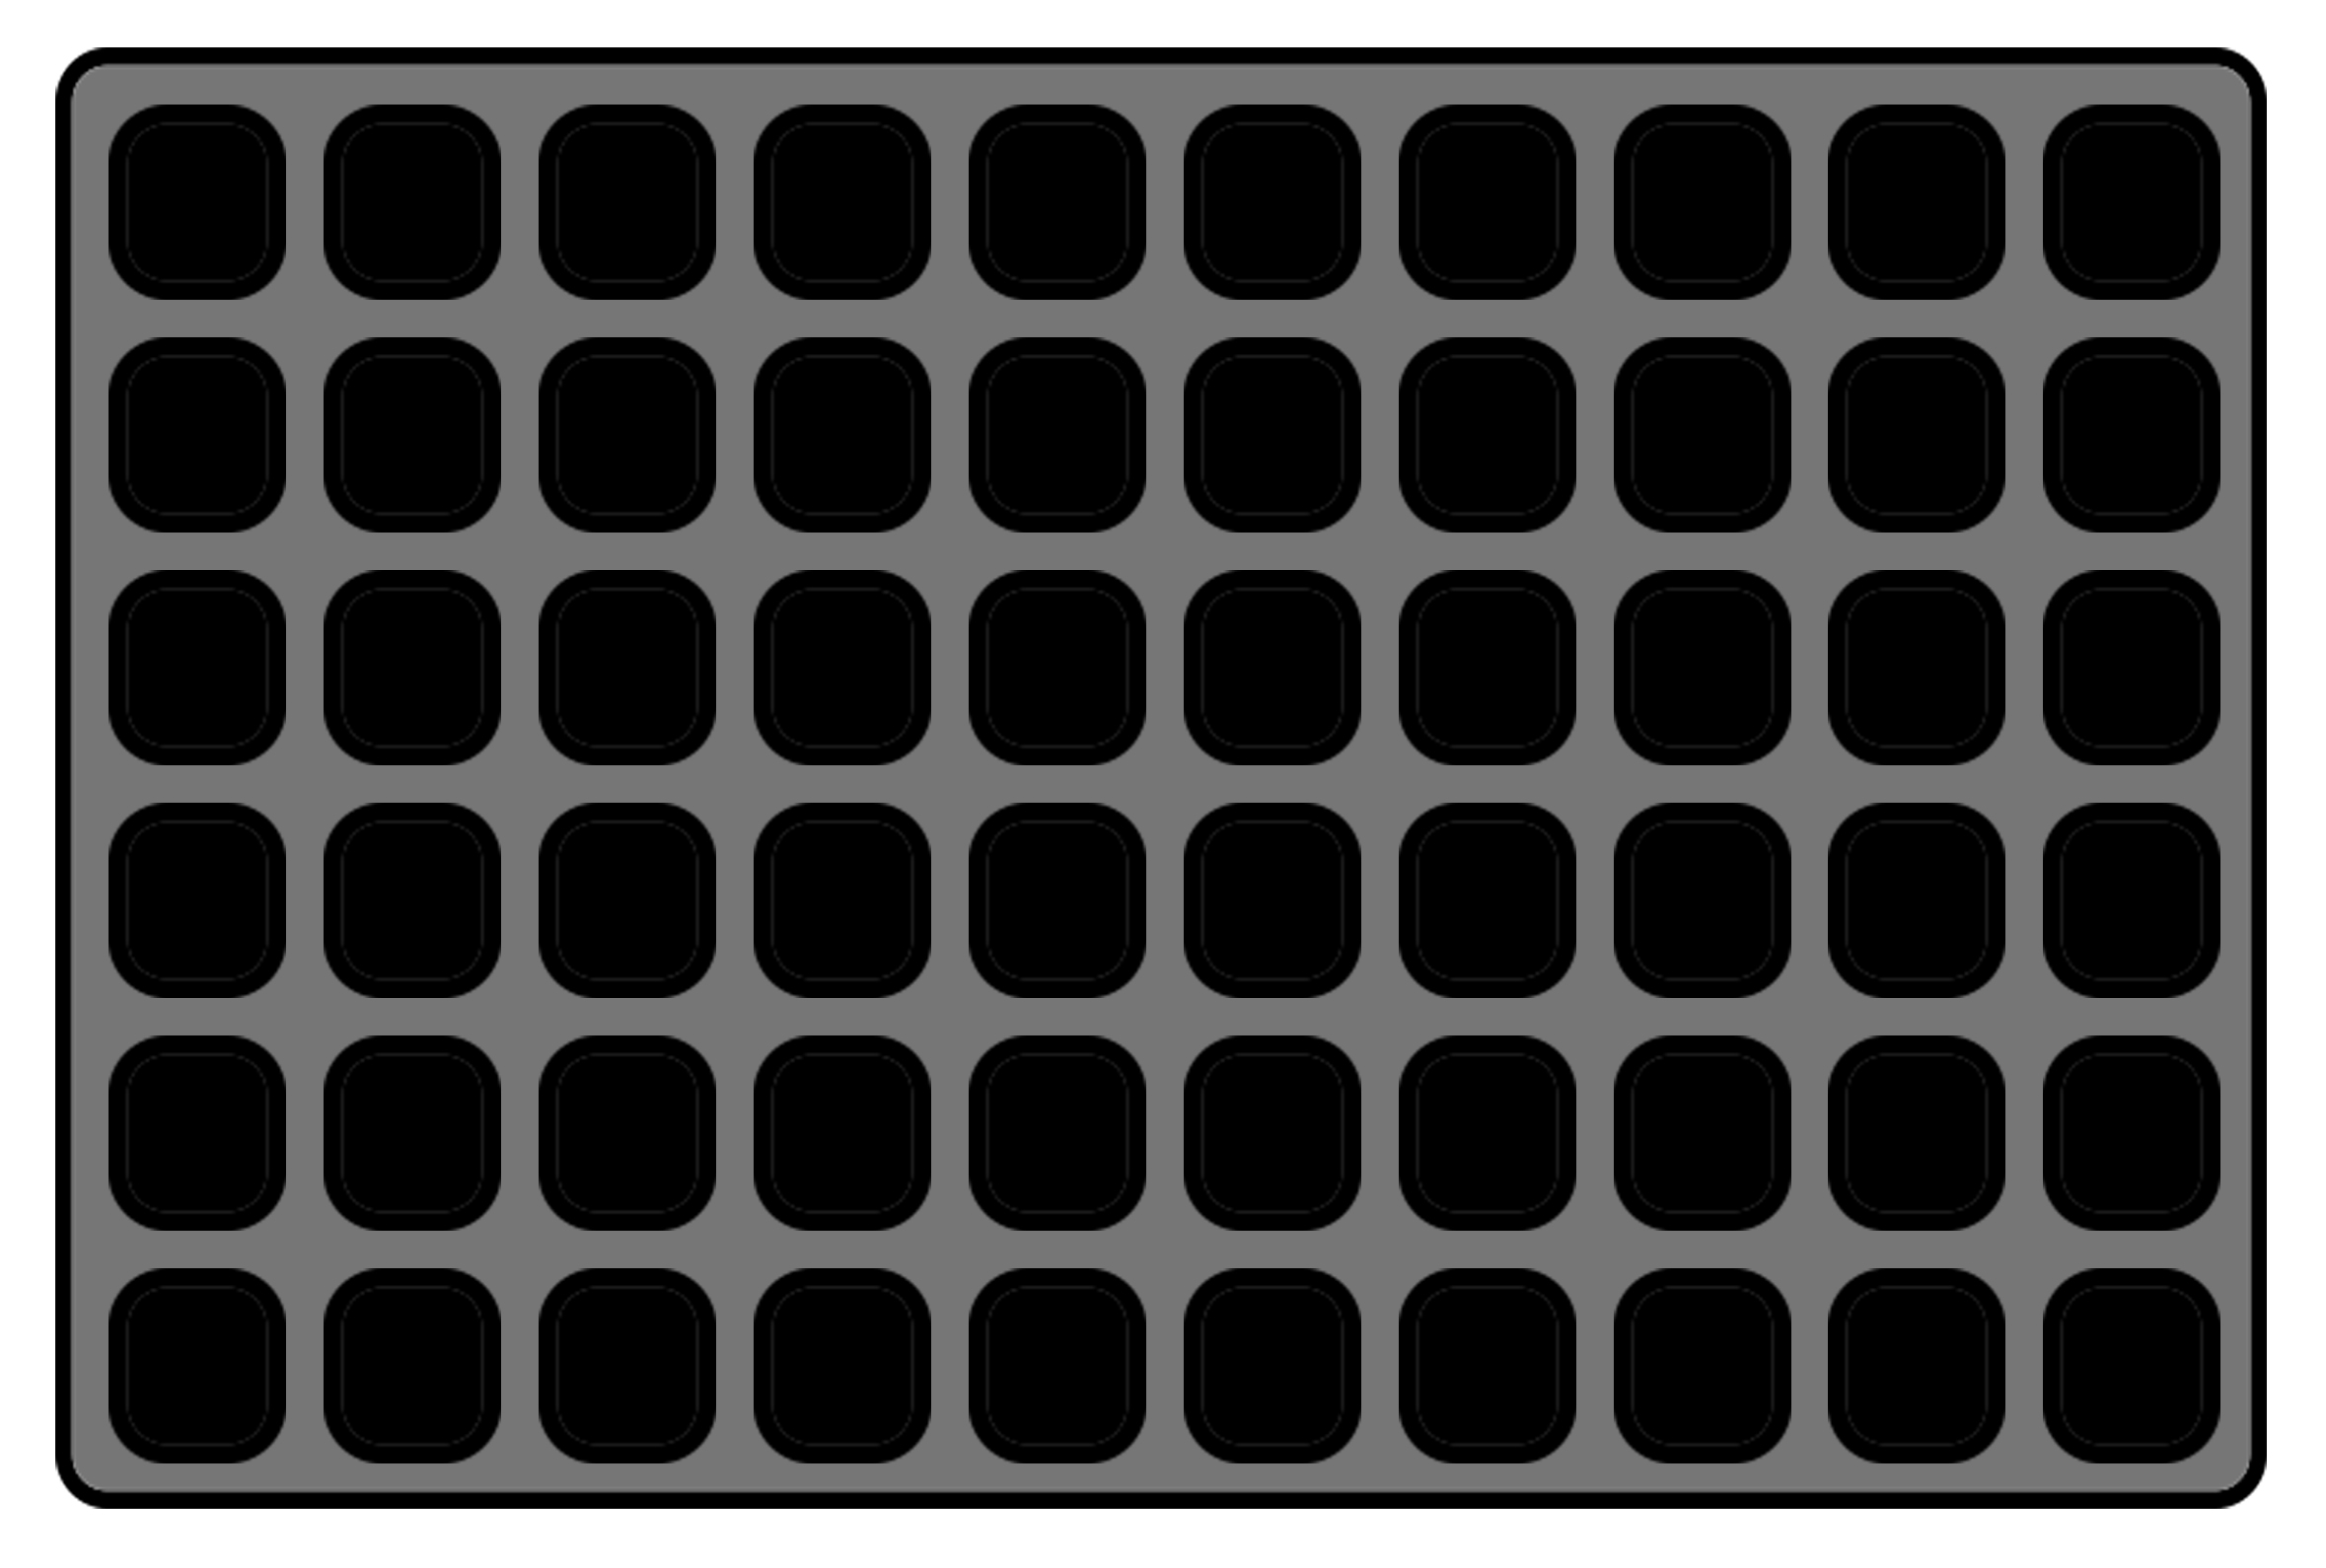

In [35]:
from PIL import Image, ImageDraw

img = Image.open("C:/Users/3791483/surfdrive/Photos/Phenotyping_Tray_schematic_6x10.jpg")
           
img